<a href="https://colab.research.google.com/github/KohsukeIde/numerical-calc/blob/main/%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E6%B3%95_%E8%AA%B2%E9%A1%8C8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jacobi method:
x = [1.44408401 1.33225235 1.10534817 0.29983737]
Gauss-Seidel method:
x = [1.44408383 1.33225254 1.10534827 0.29983774]


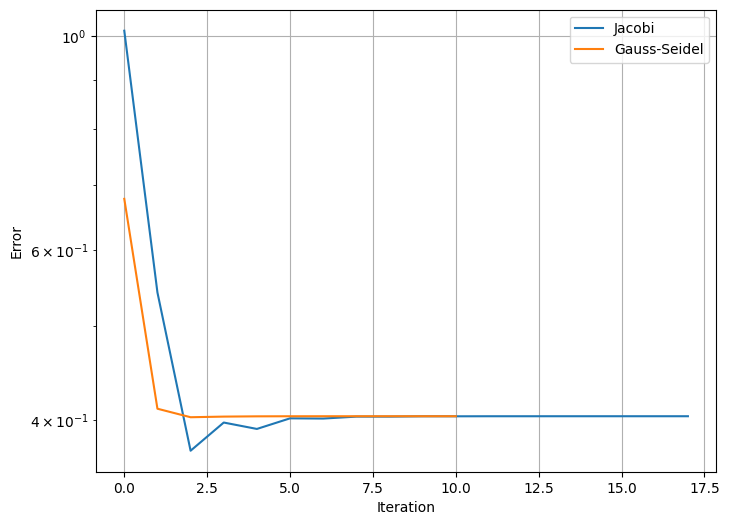

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 係数行列とベクトルを定義
A = np.array([[3, -1, 0, 0],
              [-2, 6, -1, 0],
              [0, -1, 6, -1],
              [-2, 0, -2, 7]])
b = np.array([3, 4, 5, -3])

# 厳密解を定義
x_exact = np.array([435/299, 408/299, 382/299, -19/299])

# 初期値と収束条件を設定
x0 = np.zeros(4)
tol = 1e-6
max_iter = 1000

# ヤコビ法
def jacobi(A, b, x0, tol, max_iter):
    x = x0.copy()
    err_list = []
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(len(b)):
            x_new[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,i+1:], x[i+1:])) / A[i,i]
        err = np.linalg.norm(x_new - x_exact)
        err_list.append(err)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new.copy()
    return x, err_list

# ガウス・ザイデル法
def gauss_seidel(A, b, x0, tol, max_iter):
    x = x0.copy()
    err_list = []
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(len(b)):
            x_new[i] = (b[i] - np.dot(A[i,:i], x_new[:i]) - np.dot(A[i,i+1:], x[i+1:])) / A[i,i]
        err = np.linalg.norm(x_new - x_exact)
        err_list.append(err)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new.copy()
    return x, err_list


x_jacobi, err_jacobi = jacobi(A, b, x0, tol, max_iter)
x_gauss_seidel, err_gauss_seidel = gauss_seidel(A, b, x0, tol, max_iter)


print("Jacobi method:")
print("x =", x_jacobi)
print("Gauss-Seidel method:")
print("x =", x_gauss_seidel)


plt.figure(figsize=(8, 6))
plt.semilogy(err_jacobi, label='Jacobi')
plt.semilogy(err_gauss_seidel, label='Gauss-Seidel')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()